In [36]:
#The purpose of the algorithm is not to recover the original network but 
#rather to identify important nodes and understand their impact on the network structure
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
# Load the original graph
G = nx.karate_club_graph()
print(G)
# Compute the betweenness centrality for each node
betweenness = nx.betweenness_centrality(G)
print(betweenness)
# Sort nodes in descending order based on betweenness centrality score
sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
print(sorted_nodes)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
[0, 33, 32, 2, 31, 8, 1, 13, 19, 5, 6, 27, 23, 30, 3, 25, 29, 24, 28, 9, 4, 10, 7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]


In [38]:
# Remove nodes starting with highest betweenness centrality score
# A node is having High betweenness centrality means it falls in between shortest paths of many nodes
# Due to this, there can be congestion in that particular node and leads to bottleneck and eventually
# Slows down the network
# in most real-world networks, there are often multiple shortest paths between pairs of nodes, not just one. 
# So even if we remove a node that lies on one shortest path, there may be other paths that can still connect
# the same pair of nodes.
# So by removing the node we force some traffic to take alternative routes that improves network efficiency
threshold = 1 #We want to retain at least 80% of the nodes
removed_nodes = set()
for node in sorted_nodes:
    #Removing the node that is having the highest betweenness centrality
    G.remove_node(node)
    if len(removed_nodes) > 0:
        remaining_graph = G.subgraph(G.nodes - removed_nodes)
        #Finding the largest connected component
        largest_cc = max(nx.connected_components(remaining_graph), key=len)
        #Checking whether the size of the largest connected component 
        #of the subgraph obtained by removing nodes with high betweenness centrality
        #is smaller than a certain fraction of the size of the original network.
        if len(largest_cc) < threshold * len(G):
            break
    removed_nodes.add(node)

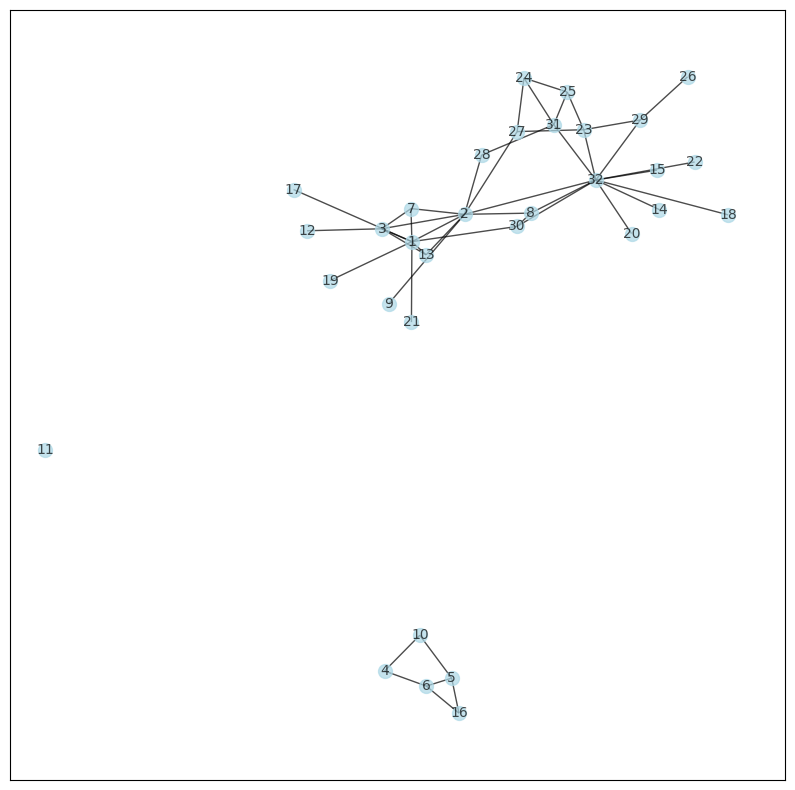

In [39]:
# Draw the remaining graph
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(G, pos=nx.spring_layout(G, k=0.3), with_labels=True, node_size=100, font_size=10, node_color='lightblue', edge_color='black', width=1.0, alpha=0.7, ax=ax)